# Data Visualization

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 0. Reead Title_Final.csv file

In [119]:
df = pd.read_csv('../data/titles_final.csv')

## Tasks

1. Total Movies & Shows
2. Content Growth Over Time (2000-2022)
3. Top Producing Countries

### 1. Total Movies & Shows

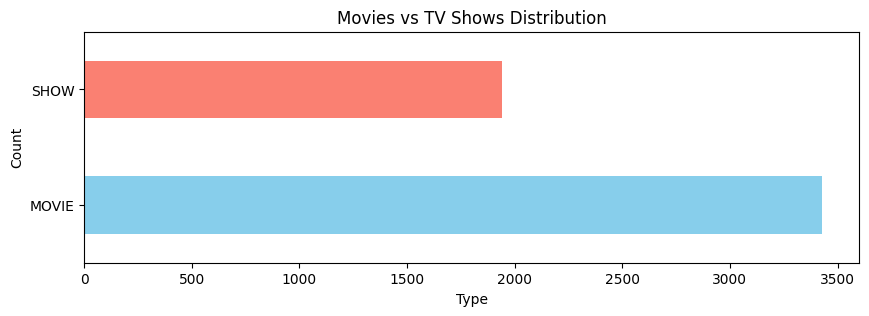

In [93]:
movies_shows = df.groupby(['type']).size()

movies_shows.plot(
            kind='barh', 
            color=['skyblue', 'salmon'],
            title="Movies vs TV Shows Distribution", 
            xlabel="Type",
            ylabel="Count",
            figsize=(10,3))

plt.xticks(rotation=0)

plt.show()

### 2. Content Growth Over Time (2000-2022)

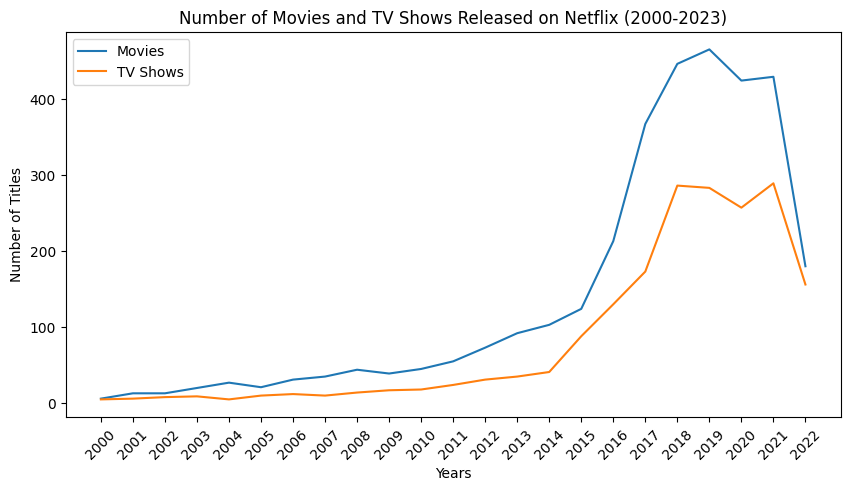

In [98]:
filtered_df = df[df['release_year'] >= 2000]

movies = filtered_df[(filtered_df['IsMovie'])].groupby('release_year').size()
shows = filtered_df[~filtered_df['IsMovie']].groupby('release_year').size()

years = movies.index

plt.figure(figsize=(10,5))
plt.plot(years, movies)
plt.plot(years, shows)
plt.xlabel("Years")
plt.ylabel("Number of Titles")
plt.legend(["Movies", "TV Shows"])
plt.title("Number of Movies and TV Shows Released on Netflix (2000-2023)")
plt.xticks(years, rotation=45)
plt.show()


### 3. Top Producing Countries

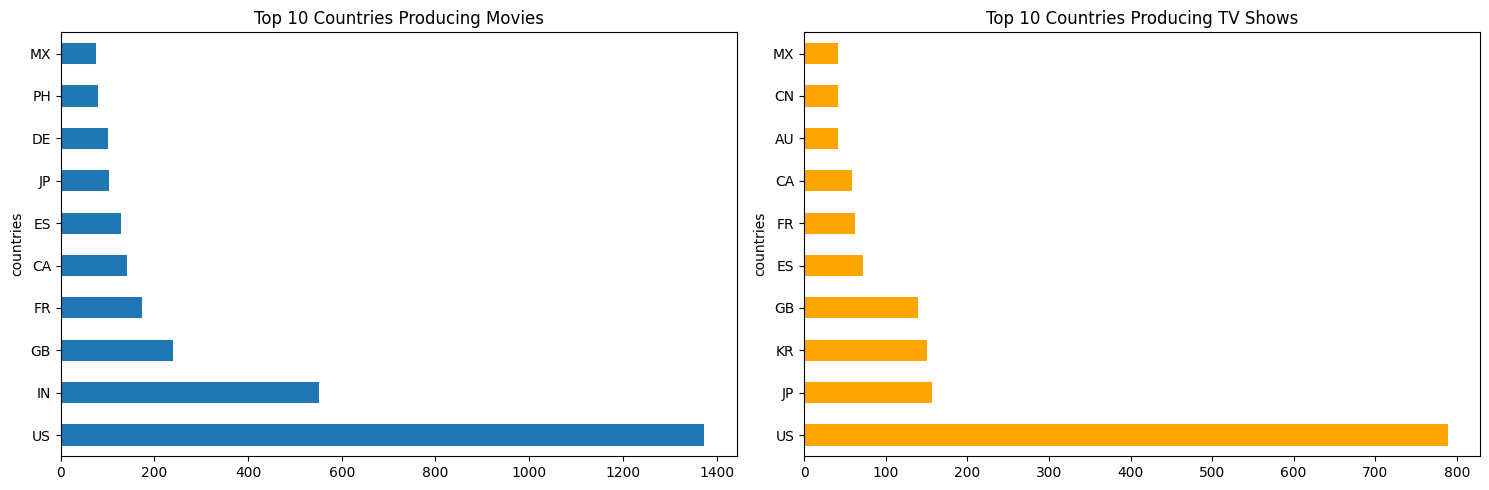

In [125]:
import ast



df['countries'] = df['production_countries'].apply(ast.literal_eval)
df_exploded = df.explode('countries')



figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0] = (df_exploded[df_exploded['IsMovie']])['countries'].value_counts().head(10).plot(
            kind='barh', ax=ax[0], title='Top 10 Countries Producing Movies')
ax[1] = (df_exploded[~df_exploded['IsMovie']])['countries'].value_counts().head(10).plot(
            kind='barh', ax=ax[1], title='Top 10 Countries Producing TV Shows', color='orange')


plt.tight_layout()
plt.show()